# Theoretical Astrophysics: Stellar Structure and Evolution 

## Python data manipulation and visualization 

### Plotting an HR diagram

### Stellar magnitudes and colors

In [1]:
# Actual packets:
import numpy as np
import matplotlib.pyplot as plt 

# Make our notebook wider
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Make our plots look nicer:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

Here we will play a bit with super basic calculations

Keep in mind that order on the screen != order in time

Type, plot... do what you feel comfortable.

In [2]:
x = 3
y = 5 
x+y

8

In [3]:
print("Sum is: ", x+y)

Sum is:  8


In [4]:
x = np.linspace(0,100,101)
y = x**2.0 - 0.01 * x**3.0

Text(0, 0.5, 'y')

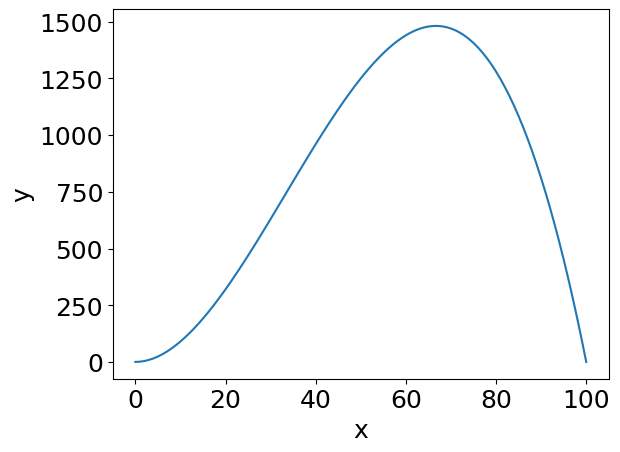

In [5]:
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

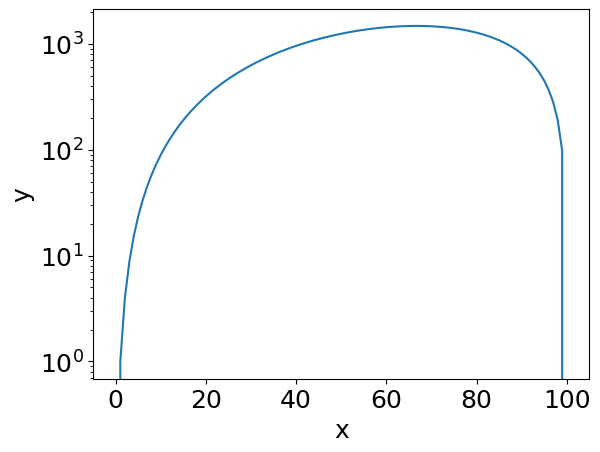

In [6]:
plt.semilogy(x,y)
plt.xlabel("x")
plt.ylabel("y")

# Plot HR diagram and talk about it

### We took it from:
http://burro.astr.cwru.edu/Academics/Astr221/HW/HW5/HW5.html

In [7]:
%ls

handson1.ipynb  yaletrigplx.dat.txt


In [8]:
stars = np.loadtxt("yaletrigplx.dat.txt",unpack=True)

In [9]:
stars.shape

(5, 6220)

column 1: star ID number

column 2: apparent V magnitude

column 3: observed B-V color

column 4: observed parallax (in arcsec)

column 5: uncertainty in parallax (in milliarcsec)

Text(0, 0.5, 'V magnitude')

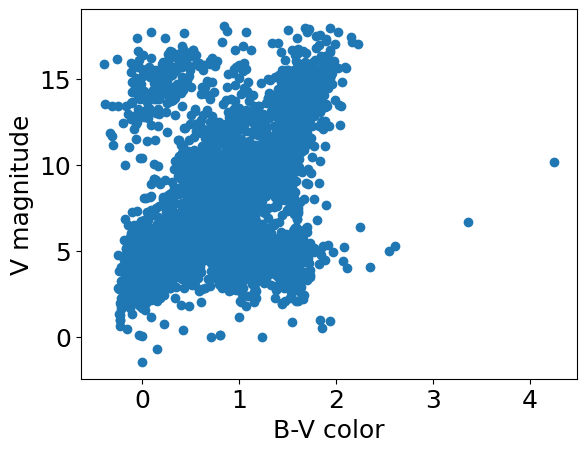

In [10]:
plt.scatter(stars[2],stars[1])
plt.xlabel("B-V color")
plt.ylabel("V magnitude")

## This is nothing interesting. Let's convert the apparent magnitudes to the absolute ones:

In [11]:
parallax = stars[3]
d = 1./parallax

### The absolute magnitude (a measure of luminosity) and the relative magnitude (measure of apparent brightness to us) are related through:

### $m = M -5 + 5 \log d $

### Where $d$ is the distance in parsecs 

In [12]:
M = stars[1] +5.0 - 5.0 * np.log10(d)

(-0.5, 2.05)

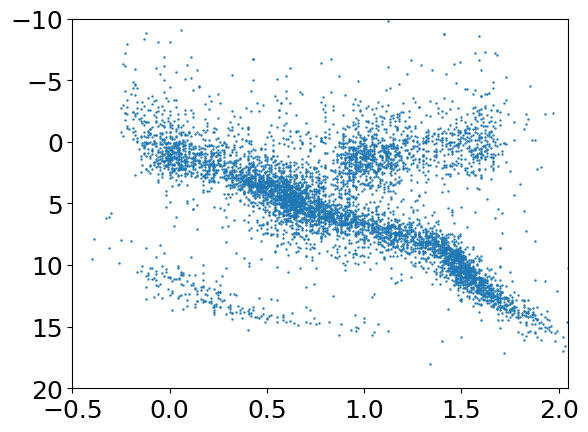

In [13]:
plt.scatter(stars[2],M,s=0.5)
plt.ylim([20,-10])
plt.xlim([-0.5,2.05])

### Discuss this for a good while! 

## Convert the absolute magnitude to Luminosity 

#### It is nice to see HR diagram but perhaps it is nicer to understand the axis a bit better. 

#### Absolute magnitude is a measure of luminosity, according to the equation:

#### $M  - M_{\odot}= -2.5 \log{L/L_{\odot}}$

#### We know that $M_{\odot} = 4.83$

In [16]:
L = 10.** ((4.83 - M)/2.5)  # in units of solar mass

Text(0, 0.5, 'Number of stars')

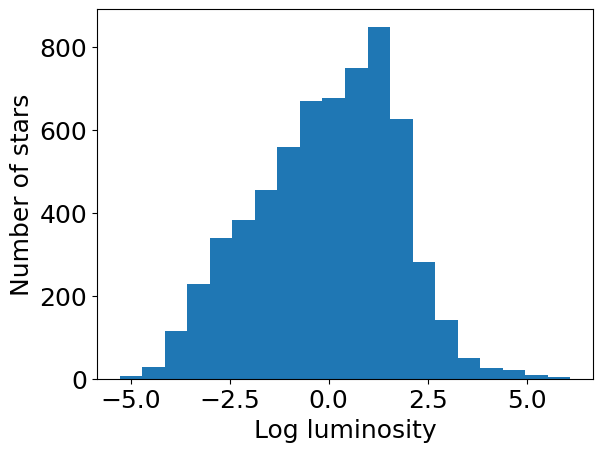

In [22]:
### Let's look at the values of Luminosity: 

plt.hist(np.log10(L), bins = 20)
plt.xlabel("Log luminosity")
plt.ylabel("Number of stars")

### There are stars that are 100 000 times brigher, or 100 000 fainter than the Sun! That is quite a span. Most of the stars that we see are similar to the Sun. 

### Keep in mind that this sample is *biased*, because we are more likely to see stars that are bright in absolute sense. 

## Now, let's also transform the color into an understandable quantity. we want to convert the B-V color to the surface temperature 

### Discuss why B-V depends on the temperature, and if it makes sense that warmer stars are bluer. Does it agree with the equation?

### Hint: As the temperature increases star is brighter in the blue compared to visible, and as magnitudes go opposite (smaller magnitude - larger brightness), B-V will go down. 

In [19]:
## According to the so called Ballestero's formula, check : https://en.wikipedia.org/wiki/Color_index and references therein: 
CI = stars[2]
T = 4600 * (1.0 / (0.92 * CI + 1.7) + 1.0 / (0.92 * CI + 0.62))

Text(0, 0.5, 'Number of stars')

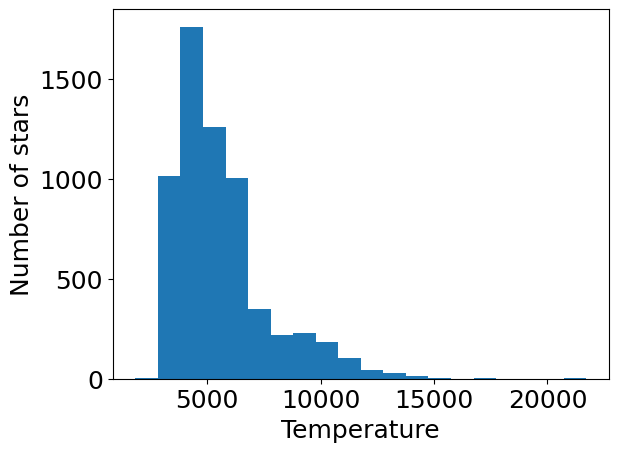

In [21]:
plt.hist(T, bins = 20)
plt.xlabel("Temperature")
plt.ylabel("Number of stars")

## Remember also: 

### GITHUB : https://github.com/

### ADSABS : https://ui.adsabs.harvard.edu/classic-form

### Overleaf : https://www.overleaf.com/




# And, if there is really a lot of time - we can estimate stellar Radii from the derived quantities: 

### $L = 4\pi R^2 T^4$